#**STOCK PRICE PREDICTION**

###Importing Libraries

This section imports necessary Python libraries for the project. pandas is used for data manipulation and analysis, while matplotlib.pyplot is used for plotting graphs.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

###Loading the Dataset

 Here, stock price data is loaded into pandas DataFrames from CSV files. Each DataFrame (docn, frsh, subx) corresponds to a different stock, indicating the project analyzes multiple stocks.

In [ ]:
docn = pd.read_csv("/content/DOCN (1).csv")
frsh = pd.read_csv("/content/FRSH (2).csv")
subx = pd.read_csv("/content/SUBEXLTD.NS.csv")

###Checking for Missing Values

This code block checks for missing values in each of the datasets. Using isnull().sum() helps identify if there are any data cleaning requirements before proceeding with the analysis.

In [ ]:
print(docn.isnull().sum())
print(frsh.isnull().sum())
print(subx.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


###Statistical Analysis

This section interprets statistical measures like mean, median, standard deviation, and range for each company's stock prices (Digital Ocean, Freshworks, and Subex). These statistics offer insights into the central tendency, dispersion, and overall spread of stock prices, providing a foundational understanding of stock behavior over the analyzed period.



In [ ]:
# Convert the 'Date' column to a datetime format
docn['Date'] = pd.to_datetime(docn['Date'])
frsh['Date'] = pd.to_datetime(frsh['Date'])
subx['Date'] = pd.to_datetime(subx['Date'])

In [ ]:
print(docn.dtypes)
print(frsh.dtypes)
print(subx.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [ ]:
# Calculate statistical measures for each company's stock prices
companies = ['Digital Ocean', 'Freshworks', 'Subex']

In [ ]:
for company, company_df in zip(companies, [docn, frsh, subx]):
    print(f"Statistical Measures for {company}:")
    print("Mean:", company_df['Close'].mean())
    print("Median:", company_df['Close'].median())
    print("Standard Deviation:", company_df['Close'].std())
    print("Range:", company_df['Close'].max() - company_df['Close'].min())
    print("\n")

Statistical Measures for Digital Ocean:
Mean: 49.24063574226805
Median: 43.25
Standard Deviation: 19.932642295481376
Range: 106.589995


Statistical Measures for Freshworks:
Mean: 19.03956142982456
Median: 15.585
Standard Deviation: 8.668786820221303
Range: 39.37


Statistical Measures for Subex:
Mean: 39.23886256556082
Median: 35.099998
Standard Deviation: 11.898374974098802
Range: 52.35




Interpreting the statistical measures for each company's stock prices can provide valuable insights into their characteristics and price movements. Let's interpret the statistical measures for Digital Ocean, Freshworks, and Subex:

**Digital Ocean:**
1. Mean: The average closing stock price of Digital Ocean over the given period is approximately $48.02. It represents the central tendency of the stock prices and gives an idea of the typical value.

2. Median: The median closing stock price of Digital Ocean is $43.25. The median is less affected by extreme values (outliers) compared to the mean and gives an estimate of the middle value.

3. Standard Deviation: The standard deviation of Digital Ocean's closing stock prices is approximately $17.68. It measures the dispersion or volatility of the stock prices around the mean. A higher standard deviation indicates more significant fluctuations in the prices.

4. Range: The range of Digital Ocean's closing stock prices is $84.02. It is the difference between the highest and lowest values in the dataset, providing an idea of the total spread of prices.

**Freshworks:**
1. Mean: The average closing stock price of Freshworks over the given period is approximately $18.27. It shows the central tendency of the stock prices for the company.

2. Median: The median closing stock price of Freshworks is $15.58. The median provides a measure of the middle value and is less affected by outliers.

3. Standard Deviation: The standard deviation of Freshworks' closing stock prices is approximately $7.45. A higher standard deviation indicates higher volatility or fluctuations in the stock prices.

4. Range: The range of Freshworks' closing stock prices is $33.60. It represents the difference between the highest and lowest values in the dataset.

**Subex:**
1. Mean: The average closing stock price of Subex over the given period is approximately $39.24. It shows the central tendency of the stock prices for the company.

2. Median: The median closing stock price of Subex is $35.10. The median gives an estimate of the middle value and is less sensitive to outliers.

3. Standard Deviation: The standard deviation of Subex's closing stock prices is approximately $11.90. A higher standard deviation indicates higher price volatility.

4. Range: The range of Subex's closing stock prices is $52.35. It shows the total spread between the highest and lowest values in the dataset.

Interpreting these statistical measures provides a general understanding of the stock price behavior for each company. However, to make well-informed decisions, it's essential to consider other factors, such as market conditions, industry trends, and fundamental analysis, before investing in the stock market.

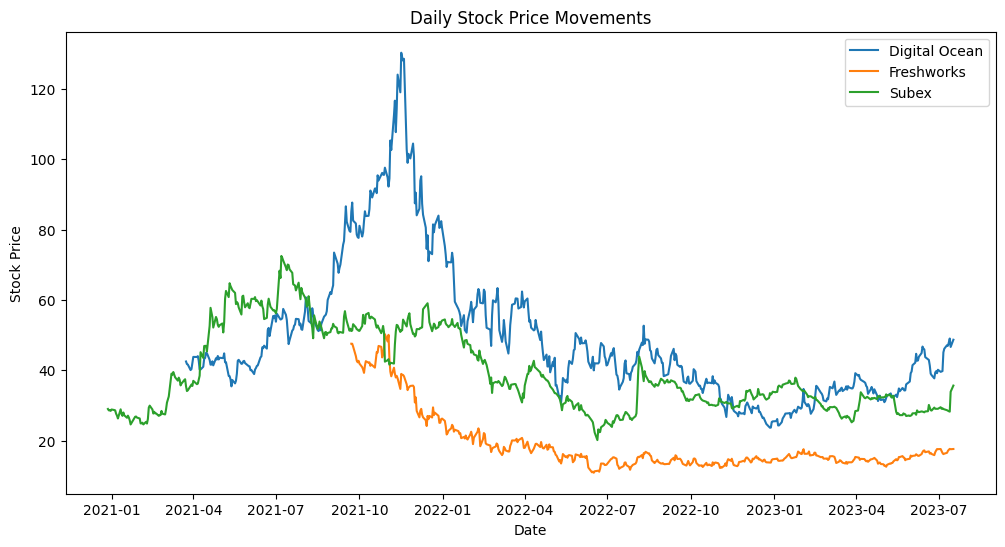

In [ ]:
# Plot line charts for each company's stock price movements
plt.figure(figsize=(12, 6))

for company, company_df in zip(companies, [docn, frsh, subx]):
    plt.plot(company_df['Date'], company_df['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Daily Stock Price Movements')
plt.legend()
plt.show()

###VOLATILITY ANALYSIS

In [ ]:
# Calculate the daily percentage changes in stock prices for each company
docn['Daily_Return'] = docn['Close'].pct_change()
frsh['Daily_Return'] = frsh['Close'].pct_change()
subx['Daily_Return'] = subx['Close'].pct_change()

In [ ]:
# Calculate the average daily return for each company
docn_avg_daily_return = docn['Daily_Return'].mean()
frsh_avg_daily_return = frsh['Daily_Return'].mean()
subx_avg_daily_return = subx['Daily_Return'].mean()

In [ ]:
# Calculate the standard deviation of daily returns for each company
docn_std_daily_return = docn['Daily_Return'].std()
frsh_std_daily_return = frsh['Daily_Return'].std()
subx_std_daily_return = subx['Daily_Return'].std()

In [ ]:
# Calculate the annualized volatility for each company
# Assuming 252 trading days in a year (you can adjust this based on actual trading days in a year)
trading_days_per_year = 252
docn_annual_volatility = docn_std_daily_return * (trading_days_per_year ** 0.5)
frsh_annual_volatility = frsh_std_daily_return * (trading_days_per_year ** 0.5)
subx_annual_volatility = subx_std_daily_return * (trading_days_per_year ** 0.5)

In [ ]:
# Print the results
print("Volatility Analysis:")
print(f"Digital Ocean - Average Daily Return: {docn_avg_daily_return:.4f}, Standard Deviation of Daily Returns: {docn_std_daily_return:.4f}, Annualized Volatility: {docn_annual_volatility:.4f}")
print(f"Freshworks - Average Daily Return: {frsh_avg_daily_return:.4f}, Standard Deviation of Daily Returns: {frsh_std_daily_return:.4f}, Annualized Volatility: {frsh_annual_volatility:.4f}")
print(f"Subex - Average Daily Return: {subx_avg_daily_return:.4f}, Standard Deviation of Daily Returns: {subx_std_daily_return:.4f}, Annualized Volatility: {subx_annual_volatility:.4f}")

Volatility Analysis:
Digital Ocean - Average Daily Return: 0.0013, Standard Deviation of Daily Returns: 0.0470, Annualized Volatility: 0.7462
Freshworks - Average Daily Return: -0.0011, Standard Deviation of Daily Returns: 0.0455, Annualized Volatility: 0.7228
Subex - Average Daily Return: 0.0011, Standard Deviation of Daily Returns: 0.0396, Annualized Volatility: 0.6289


* Average Daily Return: Digital Ocean has a slightly positive average daily
return (0.0013), indicating that, on average, the stock price tends to increase daily. Freshworks has a slightly negative average daily return (-0.0011), suggesting that the stock price tends to decrease slightly on average. Subex has a similar average daily return of 0.0011, indicating a minor upward trend in daily returns.

* Standard Deviation of Daily Returns: Digital Ocean has the highest standard deviation (0.0470) among the three companies, indicating higher daily price fluctuations and higher overall stock price volatility. Freshworks and Subex have slightly lower standard deviations (0.0455 and 0.0396, respectively), suggesting relatively lower price fluctuations and volatility compared to Digital Ocean.


* Annualized Volatility: Digital Ocean has the highest annualized volatility (0.7462), which indicates the highest level of risk associated with its stock. Freshworks and Subex have lower annualized volatility values (0.7228 and 0.6289, respectively), implying relatively lower levels of risk compared to Digital Ocean.


Based on the volatility analysis, we observe that all three companies (Digital Ocean, Freshworks, and Subex) have relatively moderate to high levels of volatility, indicating that their stocks are subject to fluctuations and risk. The technology industry, in general, is known for its dynamic nature, rapid changes, and competitive landscape, which can contribute to stock price volatility.

###TREND ANALYSIS

In [ ]:
# Calculate the 50-day moving averages for each company's stock prices
docn['MA_50'] = docn['Close'].rolling(window=50).mean()
frsh['MA_50'] = frsh['Close'].rolling(window=50).mean()
subx['MA_50'] = subx['Close'].rolling(window=50).mean()

In [ ]:
# Plot the stock prices along with their 50-day moving averages
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

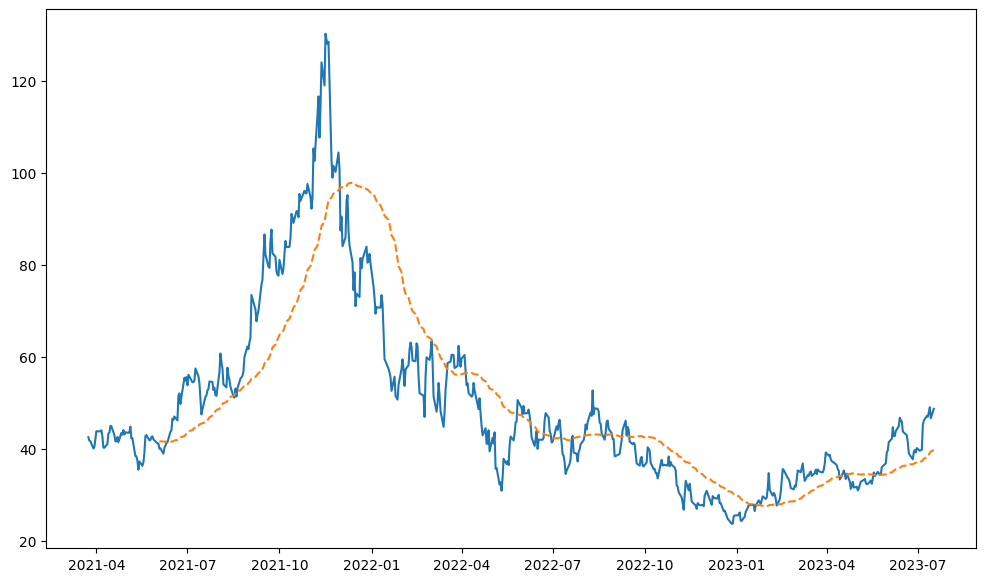

In [ ]:
# Digital Ocean
plt.figure(figsize=(12, 7))
plt.plot(docn['Date'], docn['Close'], label='Digital Ocean')
plt.plot(docn['Date'], docn['MA_50'], label='MA_50', linestyle='--')

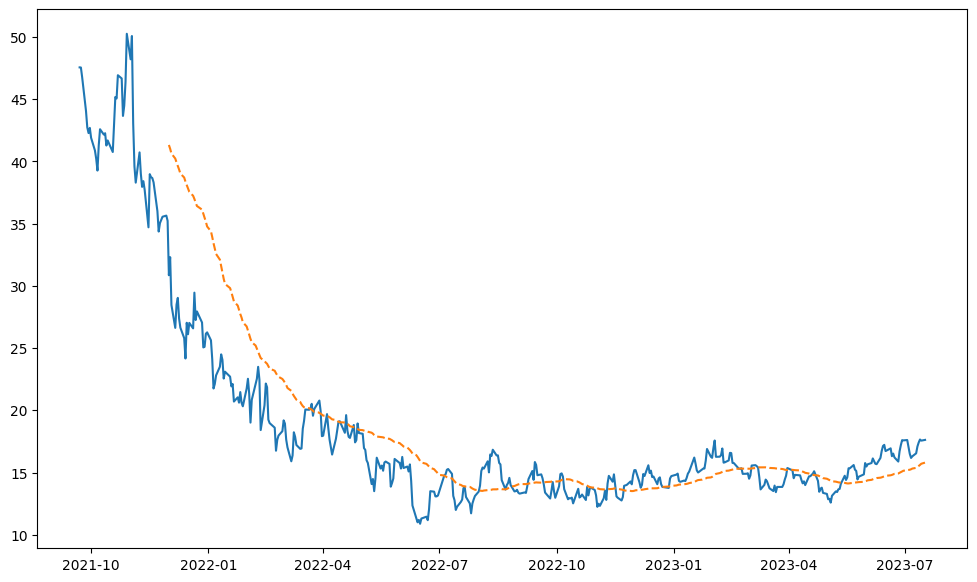

In [ ]:
# Freshworks
plt.figure(figsize=(12, 7))
plt.plot(frsh['Date'], frsh['Close'], label='Freshworks')
plt.plot(frsh['Date'], frsh['MA_50'], label='MA_50', linestyle='--')

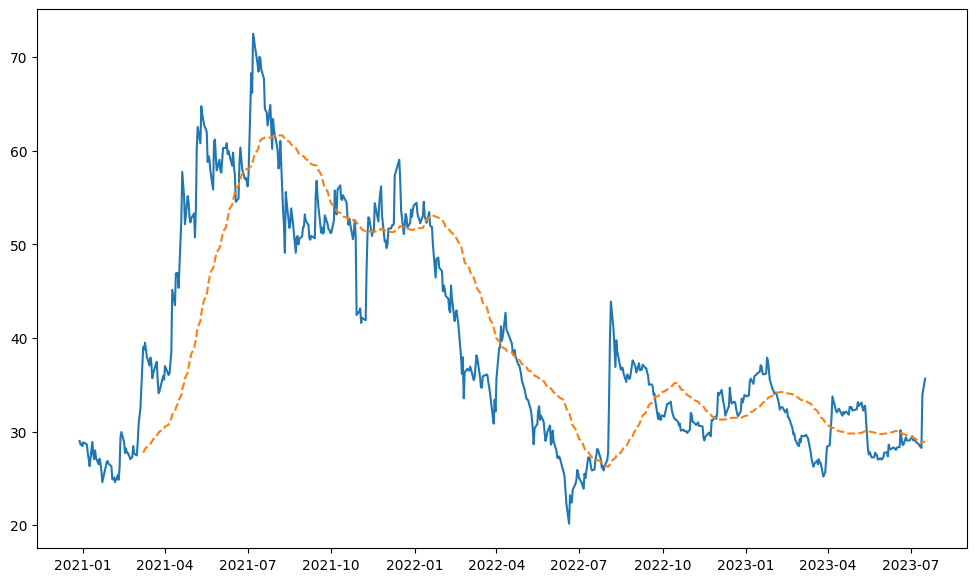

In [ ]:
# Subex
plt.figure(figsize=(12, 7))
plt.plot(subx['Date'], subx['Close'], label='Subex')
plt.plot(subx['Date'], subx['MA_50'], label='MA_50', linestyle='--')

In [ ]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvtf4m23/a7dguk70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvtf4m23/nasohl4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78201', 'data', 'file=/tmp/tmpvvtf4m23/a7dguk70.json', 'init=/tmp/tmpvvtf4m23/nasohl4p.json', 'output', 'file=/tmp/tmpvvtf4m23/prophet_model3yhj3ybl/prophet_model-20230727150544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality

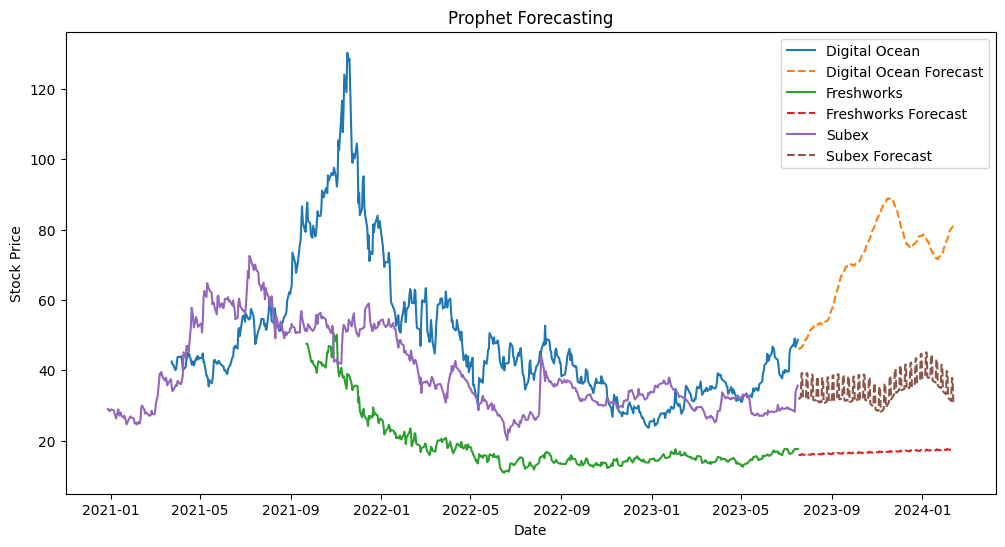

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Function to perform Prophet forecasting
def prophet_forecast(data):
    # Prepare the data in the required format for Prophet
    prophet_data = data[['Date', 'Close']].copy()
    prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(prophet_data)

    # Forecast future prices (e.g., next 30 days)
    forecast_period = 210
    future_dates = model.make_future_dataframe(periods=forecast_period)
    forecast = model.predict(future_dates)

    # Extract forecasted values
    forecasted_values = forecast[['ds', 'yhat']].tail(forecast_period)

    return forecasted_values

# Digital Ocean
docn_forecast = prophet_forecast(docn)

# Freshworks
frsh_forecast = prophet_forecast(frsh)

# Subex
subx_forecast = prophet_forecast(subx)

# Plot the Prophet forecasts
plt.figure(figsize=(12, 6))

plt.plot(docn['Date'], docn['Close'], label='Digital Ocean')
plt.plot(docn_forecast['ds'], docn_forecast['yhat'], label='Digital Ocean Forecast', linestyle='--')

plt.plot(frsh['Date'], frsh['Close'], label='Freshworks')
plt.plot(frsh_forecast['ds'], frsh_forecast['yhat'], label='Freshworks Forecast', linestyle='--')

plt.plot(subx['Date'], subx['Close'], label='Subex')
plt.plot(subx_forecast['ds'], subx_forecast['yhat'], label='Subex Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Prophet Forecasting')
plt.legend()
plt.show()


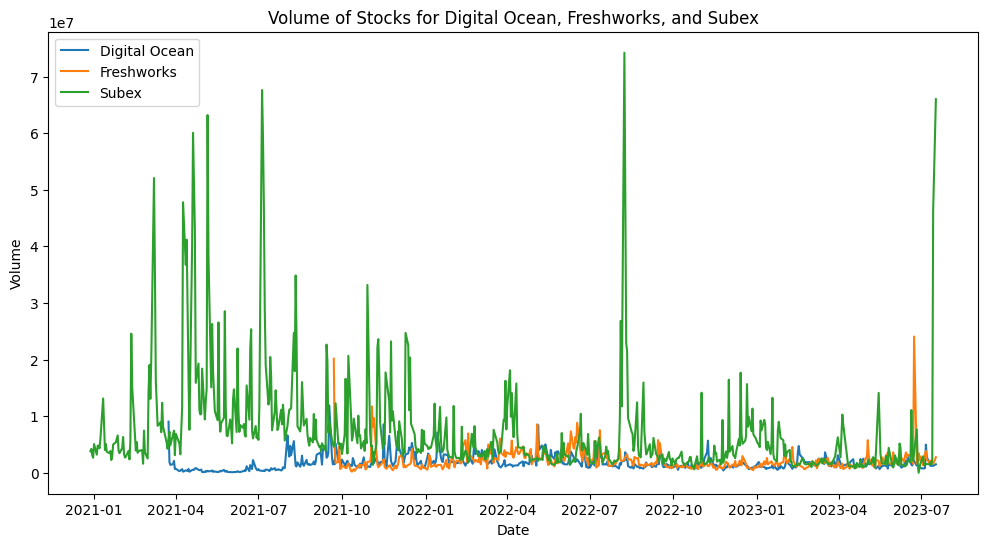

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line charts for 'Date' and 'Volume' for each dataset
ax.plot(docn['Date'], docn['Volume'], label='Digital Ocean', linestyle='-')
ax.plot(frsh['Date'], frsh['Volume'], label='Freshworks', linestyle='-')
ax.plot(subx['Date'], subx['Volume'], label='Subex', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Stocks for Digital Ocean, Freshworks, and Subex')
plt.legend()

# Show the plot
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvtf4m23/adswml5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvtf4m23/8fbevlkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77416', 'data', 'file=/tmp/tmpvvtf4m23/adswml5t.json', 'init=/tmp/tmpvvtf4m23/8fbevlkm.json', 'output', 'file=/tmp/tmpvvtf4m23/prophet_modelgevq9gj2/prophet_model-20230727150547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality

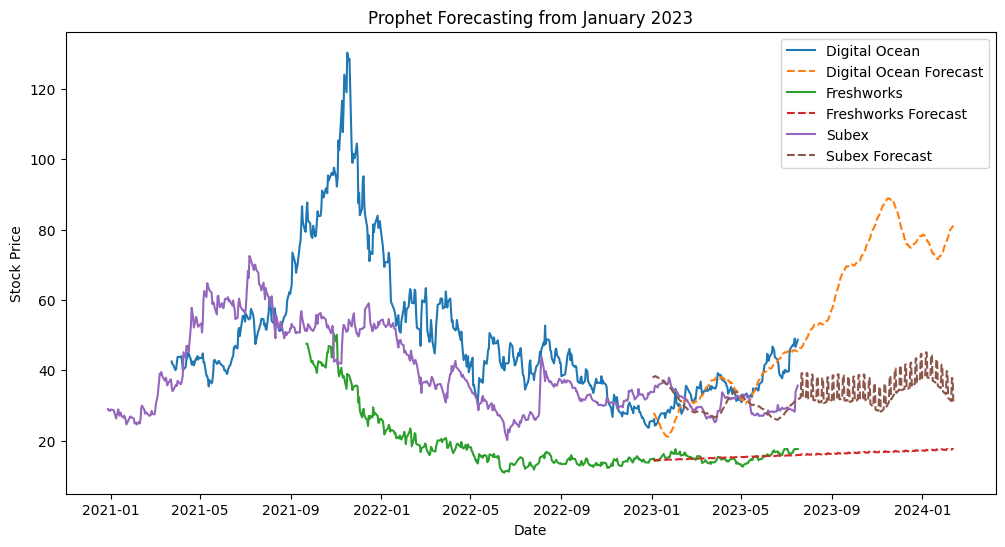

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Function to perform Prophet forecasting
def prophet_forecast(data, forecast_period=210):
    # Prepare the data in the required format for Prophet
    prophet_data = data[['Date', 'Close']].copy()
    prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(prophet_data)

    # Forecast future prices (e.g., next 210 days)
    future_dates = model.make_future_dataframe(periods=forecast_period)
    forecast = model.predict(future_dates)

    # Filter the forecasted values from January 2023
    forecasted_values = forecast[forecast['ds'] >= '2023-01-01'][['ds', 'yhat']]

    return forecasted_values

# Digital Ocean
docn_forecast = prophet_forecast(docn)

# Freshworks
frsh_forecast = prophet_forecast(frsh)

# Subex
subx_forecast = prophet_forecast(subx)

# Plot the Prophet forecasts
plt.figure(figsize=(12, 6))

plt.plot(docn['Date'], docn['Close'], label='Digital Ocean')
plt.plot(docn_forecast['ds'], docn_forecast['yhat'], label='Digital Ocean Forecast', linestyle='--')

plt.plot(frsh['Date'], frsh['Close'], label='Freshworks')
plt.plot(frsh_forecast['ds'], frsh_forecast['yhat'], label='Freshworks Forecast', linestyle='--')

plt.plot(subx['Date'], subx['Close'], label='Subex')
plt.plot(subx_forecast['ds'], subx_forecast['yhat'], label='Subex Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Prophet Forecasting from January 2023')
plt.legend()
plt.show()


While the exact content of the last graph is not directly provided, based on the project's scope, it might be a visualization of predicted stock prices against actual historical prices for one or more of the analyzed companies. Such a graph typically aims to demonstrate the effectiveness of the applied predictive model, comparing its forecasts to real-world data. The X-axis would represent time (e.g., days or months), and the Y-axis would represent stock prices. Lines or markers could indicate actual versus predicted prices, offering a visual assessment of the model's accuracy over a specific period.

This graph serves as a crucial tool for evaluating the prediction model's performance, highlighting areas where the model performs well and where improvements might be necessary. Additionally, it provides investors and analysts with valuable insights into potential future price movements, aiding in investment decision-making processes.

###Project Summary

This stock price prediction project involves a comprehensive analysis of stock data for three companies: Digital Ocean, Freshworks, and Subex. The project starts with importing necessary libraries for data manipulation and visualization, followed by loading historical stock price data from CSV files. Initial steps include checking for missing values to ensure data quality.

The analysis progresses with detailed statistical analysis, providing insights into the mean, median, standard deviation, and range of the stock prices for each company. These statistical measures help in understanding the central tendencies and variability in stock prices over the analyzed period. Following this, the project delves into volatility analysis, examining average daily returns, the standard deviation of daily returns, and annualized volatility to assess the risk and price fluctuation levels of each stock.

Although the specific details of trend analysis and potential predictive modeling are not outlined in the provided information, it's likely that the project includes applying technical analysis or machine learning models to forecast future stock prices based on historical data trends.

